In [1]:
import pandas as pd

In [2]:
scenes = ['tum_cabinet', 'tum_desk', 'tum_long_office', 'tum_pioneer'] # ['icl_living', 'icl_office'] # 
# scenes = ['icl_living', 'icl_office'] #
end_indices = [30, 30, 22, 11, 52, 57]

df = []
for i, scene in enumerate(scenes):
    end_ind = 11
    ddpff = pd.read_csv('C://Users//dimaj//Desktop//met_final-20220313T191313Z-001//met_final//met_DDPFF//{}//results.csv'.format(scene))[:end_ind]
    ddpff['method'] = 'DDPFF'
    pclcc = pd.read_csv('C://Users//dimaj//Desktop//met_final-20220313T191313Z-001//met_final//met_pclcc//{}//results.csv'.format(scene))[:end_ind]
    pclcc['method'] = 'PCLCC'
    pclrg = pd.read_csv('C://Users//dimaj//Desktop//met_final-20220313T191313Z-001//met_final//met_pclrg//{}//results.csv'.format(scene))[:end_ind]
    pclrg['method'] = 'PCLRG'
    peac = pd.read_csv('C://Users//dimaj//Desktop//met_final-20220313T191313Z-001//met_final//met_peac//{}//results.csv'.format(scene))[:end_ind]
    peac['method'] = 'PEAC'
    storm_irit = pd.read_csv('C://Users//dimaj//Desktop//met_final-20220313T191313Z-001//met_final//met_irit//{}//results.csv'.format(scene))[:end_ind]
    storm_irit['method'] = 'STORM-IRIT'
    tams = pd.read_csv('C://Users//dimaj//Desktop//met_final-20220313T191313Z-001//met_final//met_TAMS//{}//results.csv'.format(scene))[:end_ind]
    tams['method'] = 'TAMS'
    cape = pd.read_csv('C://Users//dimaj//Desktop//met_final-20220313T191313Z-001//met_final//met_cape//{}//results.csv'.format(scene))[:end_ind]
    cape['method'] = 'CAPE'
    
    # storm irit disabled!!!!
    if scene != 'tum_pioneer':
        df += [ddpff, pclcc, pclrg, peac, tams, cape]
    else:
        df += [ddpff, pclcc, pclrg, peac, tams, cape]


In [3]:
end_ind

11

In [4]:
df = pd.concat(df)

In [5]:
df

,multi_precision,multi_recall,multi_under_segmented,multi_over_segmented,multi_missed,multi_noise,mean_iou,mean_dice,mean_precision,mean_recall,mean_fScore,method
0,0.034483,0.125000,0.155172,0.625000,0.875000,0.965517,0.096681,0.123685,0.369855,0.122682,0.123685,DDPFF
1,0.068182,0.150000,0.454545,0.900000,0.850000,0.931818,0.181197,0.238286,0.499967,0.239204,0.238286,DDPFF
2,0.039216,0.083333,0.294118,0.666667,0.916667,0.960784,0.156180,0.200692,0.408683,0.201534,0.200692,DDPFF
3,0.051724,0.115385,0.258621,0.692308,0.884615,0.948276,0.157256,0.204441,0.386925,0.208296,0.204441,DDPFF
4,0.095238,0.300000,0.190476,0.700000,0.700000,0.904762,0.143407,0.176707,0.445030,0.162418,0.176707,DDPFF
...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.500000,0.071429,1.000000,0.214286,0.928571,0.500000,0.763719,0.854449,0.772320,0.990704,0.854449,CAPE
7,0.600000,0.230769,1.000000,0.461538,0.769231,0.400000,0.863399,0.923795,0.871023,0.998280,0.923795,CAPE
8,0.500000,0.100000,1.000000,0.550000,0.900000,0.500000,0.641532,0.749164,0.651093,0.981730,0.749164,CAPE
9,0.714286,0.263158,1.000000,0.473684,0.736842,0.285714,0.740484,0.811921,0.888372,0.848948,0.811921,CAPE


In [6]:
# df = pd.concat([cape, pclcc, storm_irit, ddpff, peac, pclrg, tams])

df_melt = pd.melt(df, 'method', var_name="metric", value_name='')

In [7]:
df[df['method'] == 'PCLRG']

,multi_precision,multi_recall,multi_under_segmented,multi_over_segmented,multi_missed,multi_noise,mean_iou,mean_dice,mean_precision,mean_recall,mean_fScore,method
0,0.136842,0.812500,0.063158,0.875000,0.187500,0.863158,0.151442,0.166930,0.485961,0.161929,0.166930,PCLRG
1,0.218182,0.600000,0.181818,0.750000,0.400000,0.781818,0.264254,0.293718,0.493536,0.297876,0.293718,PCLRG
2,0.333333,0.416667,0.300000,0.500000,0.583333,0.666667,0.486908,0.552256,0.618816,0.608667,0.552256,PCLRG
3,0.406250,0.500000,0.343750,0.423077,0.500000,0.593750,0.547462,0.604544,0.633901,0.645991,0.604544,PCLRG
4,0.160494,0.650000,0.123457,0.600000,0.350000,0.839506,0.203290,0.225288,0.414058,0.221983,0.225288,PCLRG
5,0.205128,0.727273,0.076923,0.636364,0.272727,0.794872,0.228696,0.247720,0.381734,0.266924,0.247720,PCLRG
6,0.250000,1.000000,0.187500,1.000000,0.000000,0.750000,0.245167,0.248701,0.332311,0.245601,0.248701,PCLRG
7,0.375000,1.000000,0.125000,0.666667,0.000000,0.625000,0.357705,0.367897,0.414344,0.362391,0.367897,PCLRG
8,0.159091,0.700000,0.090909,0.600000,0.300000,0.840909,0.195733,0.212117,0.340620,0.213318,0.212117,PCLRG
9,0.155844,0.705882,0.155844,0.764706,0.294118,0.844156,0.190099,0.214057,0.508501,0.208027,0.214057,PCLRG


In [8]:
df_melt

,method,metric,
0,DDPFF,multi_precision,0.034483
1,DDPFF,multi_precision,0.068182
2,DDPFF,multi_precision,0.039216
3,DDPFF,multi_precision,0.051724
4,DDPFF,multi_precision,0.095238
...,...,...,...
1447,CAPE,mean_fScore,0.854449
1448,CAPE,mean_fScore,0.923795
1449,CAPE,mean_fScore,0.749164
1450,CAPE,mean_fScore,0.811921


In [9]:
df_melt[df_melt['method'] == 'CAPE'][df_melt['metric'] == 'mean_iou']

C:\Users\dimaj\AppData\Local\Temp/ipykernel_13772/2396299018.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_melt[df_melt['method'] == 'CAPE'][df_melt['metric'] == 'mean_iou']


,method,metric,
847,CAPE,mean_iou,0.592775
848,CAPE,mean_iou,0.515158
849,CAPE,mean_iou,0.593395
850,CAPE,mean_iou,0.678658
851,CAPE,mean_iou,0.654970
852,CAPE,mean_iou,0.765221
853,CAPE,mean_iou,0.545739
854,CAPE,mean_iou,0.674442
855,CAPE,mean_iou,0.792619
856,CAPE,mean_iou,0.671130


C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

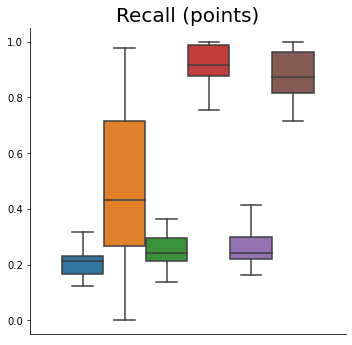

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'mean_recall'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('Recall (points)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_mean_recall.pdf')
# plt.semilogy()

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

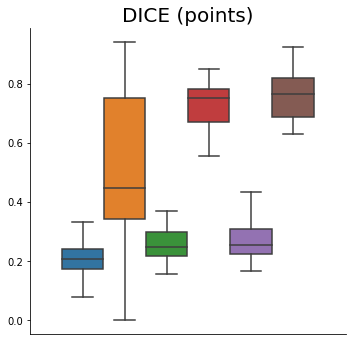

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'mean_dice'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('DICE (points)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_mean_dice.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

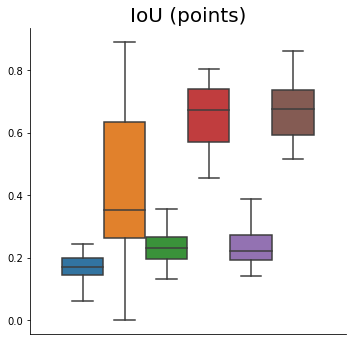

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'mean_iou'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('IoU (points)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_mean_iou.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

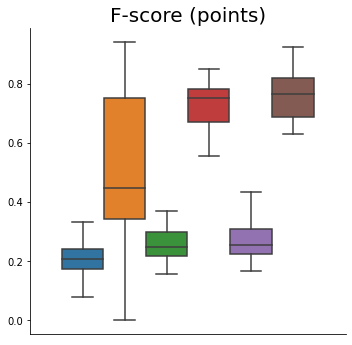

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'mean_fScore'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('F-score (points)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_mean_fscore.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

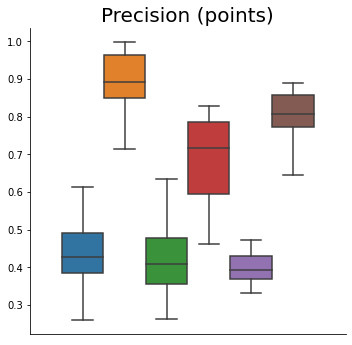

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'mean_precision'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('Precision (points)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_mean_precision.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

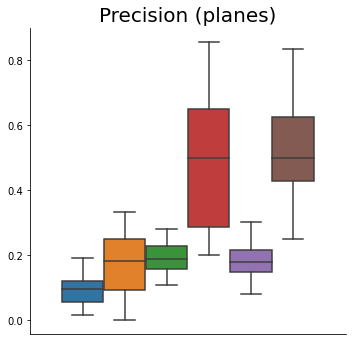

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'multi_precision'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('Precision (planes)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_multi_precision.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

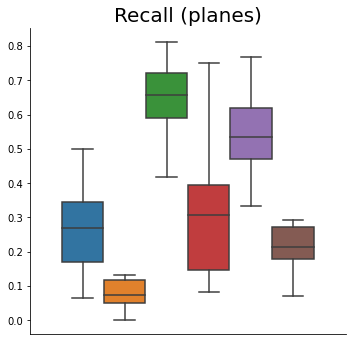

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'multi_recall'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('Recall (planes)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_multi_recall.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

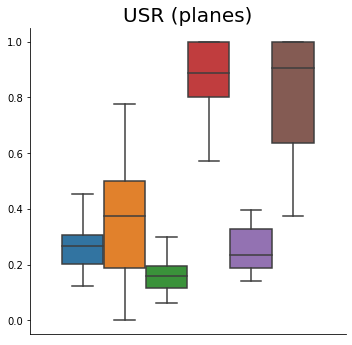

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'multi_under_segmented'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('USR (planes)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_multi_usr.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

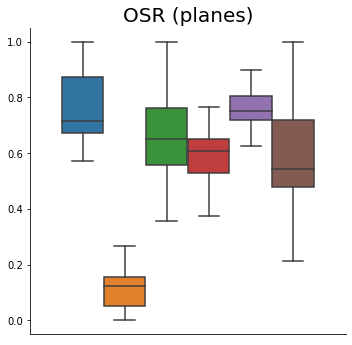

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'multi_over_segmented'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('OSR (planes)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_multi_osr.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

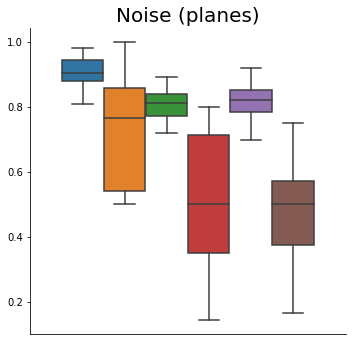

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'multi_noise'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('Noise (planes)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_multi_noise.pdf')

C:\Users\dimaj\Documents\Github\PlaneDetector\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

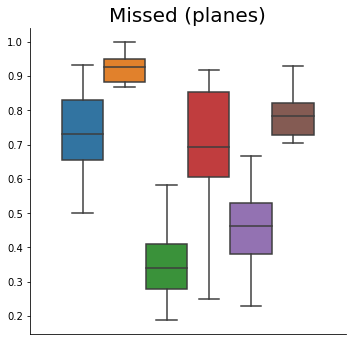

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.factorplot(x='metric', y='', hue='method', data=df_melt[df_melt['metric'] == 'multi_missed'], kind='box', showfliers = False, legend=False)
g = plt.gca()
g.axes.get_xaxis().set_visible(False)
g.axes.get_yaxis()
g.legend()
g.set_title('Missed (planes)', fontsize=20)
plt.gca().get_legend().remove()
plt.savefig('tum_multi_missed.pdf')